<a href="https://colab.research.google.com/github/gnitnaw/LDL/blob/main/tf_framework/c5e1_mnist_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


'\nThe MIT License (MIT)\nCopyright (c) 2021 NVIDIA\nPermission is hereby granted, free of charge, to any person obtaining a copy of\nthis software and associated documentation files (the "Software"), to deal in\nthe Software without restriction, including without limitation the rights to\nuse, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of\nthe Software, and to permit persons to whom the Software is furnished to do so,\nsubject to the following conditions:\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS\nFOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR\nCOPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER\nIN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OU

This code example contains a TensorFlow implementation of a network classifying handwritten digits. More context for this code example can be found in the section "Programming Example: Moving to a DL Framework" in Chapter 5 in the book Learning Deep Learning by Magnus Ekman (ISBN: 9780137470358).


The first code snippet contains initialization code for our TensorFlow example. TensorFlow has its own random seed that needs to be set if we want reproducible results. The code snippet also sets the logging level to only print out errors while suppressing warnings.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import logging

tf.get_logger().setLevel(logging.ERROR)
tf.random.set_seed(7)

EPOCHS = 20
BATCH_SIZE = 1


We then load and prepare our MNIST dataset. Because MNIST is a common dataset, it is included in Keras. We can access it by a call to keras.datasets.mnist and load_data. The variables train_images and test_images will contain the input values, and the variables train_labels and test_labels will contain the ground truth.

We standardize the input data and one-hot encode the labels. We use the function to_categorical to one-hot encode our labels.


In [3]:
# Load training and test datasets.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,
                               test_labels) = mnist.load_data()

# Standardize the data.
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

# One-hot encode labels.
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


We are now ready to create our network. There is no need to define variables for individual neurons because the framework provides functionality to instantiate entire layers of neurons at once. We do need to decide how to initialize the weights, which we do by creating an initializer object, as shown in the code snippet below.

The network is created by instantiating a keras.Sequential object, which implies that we are using the Keras Sequential API. We pass a list of layers as an argument to the Sequential class. The first layer is a Flatten layer, which does not do computations but only changes the organization of the input. In our case, the inputs are changed from a 28×28 array into an array of 784 elements. The second and third layers are both Dense layers, which means they are fully connected. The first argument tells how many neurons each layer should have, and the activation argument tells the type of activation function; we choose tanh and sigmoid, where sigmoid means the logistic sigmoid function. We pass our initializer object to initialize the regular weights using the kernel_initializer argument. The bias weights are initialized to 0 using the bias_initializer argument.


In [4]:
# Object used to initialize weights.
initializer = keras.initializers.RandomUniform(
    minval=-0.1, maxval=0.1)

# Create a Sequential model.
# 784 inputs.
# Two Dense (fully connected) layers with 25 and 10 neurons.
# tanh as activation function for hidden layer.
# Logistic (sigmoid) as activation function for output layer.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])


We are now ready to train the network, which is done in the next code snippet. We first create a keras.optimizer.SGD object. This means that we want to use stochastic gradient descent (SGD) when training the network. We then prepare the model for training by calling the model’s compile function. We provide parameters to specify which loss function to use, the optimizer that we just created and that we are interested in looking at the accuracy metric during training. Note that although this example uses mean squared error (MSE) as loss function, in general that is not a good choice in combination with sigmoid output neurons. We change this in subsequent programming examples.

We finally call the fit function for the model, which starts the training process. As the function name indicates, it fits the model to the data. The first two arguments specify the training dataset. The parameter validation_data is the test dataset. Our variables EPOCHS and BATCH_SIZE from the initialization code determine how many epochs to train for and what batch size we use. We had set BATCH_SIZE to 1, which means that we update the weight after a single training example. We set verbose=2 to get a reasonable amount of information printed during the training process and set shuffle to True to indicate that we want the order of the training data to be randomized during the training process.


In [5]:
# Use stochastic gradient descent (SGD) with
# learning rate of 0.01 and no other bells and whistles.
# MSE as loss function and report accuracy during training.
opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer = opt,
              metrics =['accuracy'])
# Train the model for 20 epochs.
# Shuffle (randomize) order.
# Update weights after each example (batch_size=1).
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)


Epoch 1/20
60000/60000 - 79s - loss: 0.0493 - accuracy: 0.7168 - val_loss: 0.0242 - val_accuracy: 0.9007 - 79s/epoch - 1ms/step
Epoch 2/20
60000/60000 - 73s - loss: 0.0200 - accuracy: 0.9038 - val_loss: 0.0165 - val_accuracy: 0.9185 - 73s/epoch - 1ms/step
Epoch 3/20
60000/60000 - 71s - loss: 0.0158 - accuracy: 0.9161 - val_loss: 0.0143 - val_accuracy: 0.9238 - 71s/epoch - 1ms/step
Epoch 4/20
60000/60000 - 72s - loss: 0.0141 - accuracy: 0.9230 - val_loss: 0.0132 - val_accuracy: 0.9256 - 72s/epoch - 1ms/step
Epoch 5/20
60000/60000 - 71s - loss: 0.0130 - accuracy: 0.9279 - val_loss: 0.0124 - val_accuracy: 0.9286 - 71s/epoch - 1ms/step
Epoch 6/20
60000/60000 - 71s - loss: 0.0123 - accuracy: 0.9312 - val_loss: 0.0119 - val_accuracy: 0.9317 - 71s/epoch - 1ms/step
Epoch 7/20
60000/60000 - 71s - loss: 0.0117 - accuracy: 0.9340 - val_loss: 0.0115 - val_accuracy: 0.9333 - 71s/epoch - 1ms/step
Epoch 8/20
60000/60000 - 72s - loss: 0.0113 - accuracy: 0.9365 - val_loss: 0.0112 - val_accuracy: 0.9343

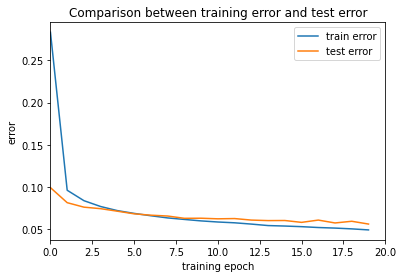

In [9]:
# summarize history for accuracy
plt.plot(1.0 - np.array(history.history['accuracy']))
plt.plot(1.0 - np.array(history.history['val_accuracy']))
plt.title('Comparison between training error and test error')
plt.ylabel('error')
plt.xlabel('training epoch')
plt.xlim(0,20)
plt.legend(['train error', 'test error'], loc='upper right')
plt.show()

